<a href="https://colab.research.google.com/github/cristobalc24/Sistemas-de-Informaci-n/blob/main/Localizaci%C3%B3n_GEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código de localización de nuevo almacén/planta en función de número de viajes.

Profesor: Dr. Mervyn Marquez G.

Ayudante: Esteban Llanquimán.

Si es la primera vez que se ejecuta el código,
es necesario un grafo de la ciudad para mostrar los puntos en el mapa.
Para ello usaremos la biblioteca osmnx.

Carga de biblioteca osmnx

In [ ]:
!pip install osmnx
import osmnx as ox

Descarga del grafo de la ciudad

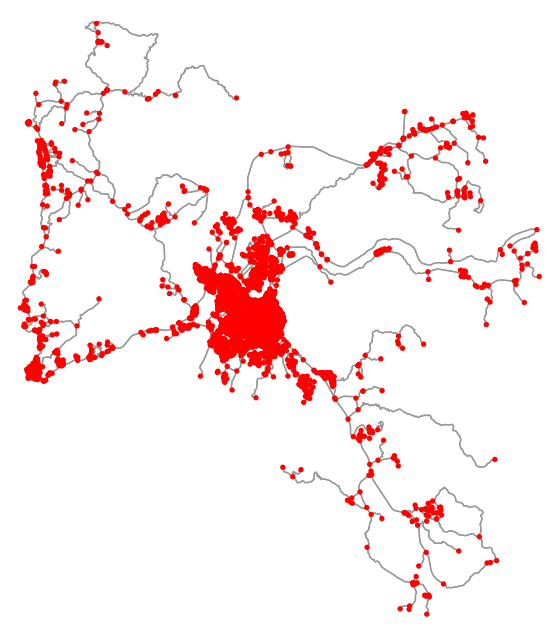

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ciudad = "Valdivia, Chile" #Con este nombre también se guardará el mapa descargado

G = ox.graph_from_place(ciudad, network_type='drive') # Descarga el grafo de las calles
ox.save_graphml(G, filepath=str(ciudad)+".graphml") # Guardar el grafo en un archivo .graphml
ox.plot_graph(ox.project_graph(G),bgcolor="white",node_color='red') # Visualiza el grafo para asegurarte de que se ha descargado correctamente

Si descargamos varios mapas, aquí podemos elegir cual usar.

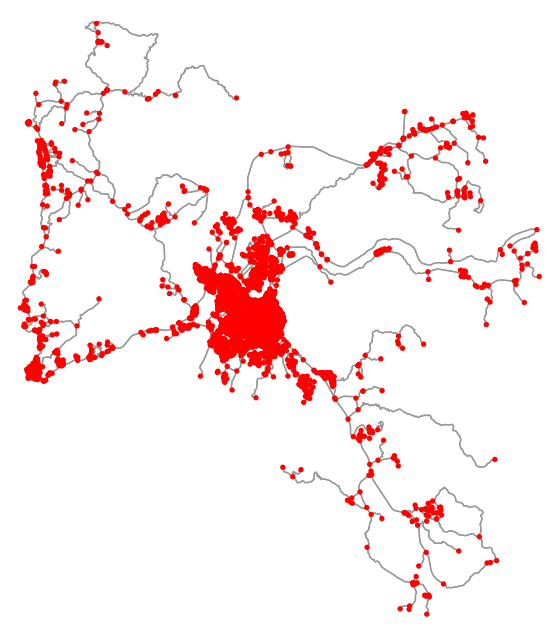

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G = ox.load_graphml(str("Valdivia, Chile")+".graphml")
ox.plot_graph(ox.project_graph(G),bgcolor="white",node_color='red')

Recogemos las coordenadas de clientes y proveedores, así como los viajes diarios

In [ ]:
import pandas as pd
coordenadas = pd.read_excel("coordenadas.xlsx")
viajes_diarios = coordenadas['viajes diarios']
latitudes = coordenadas['lat']
longitudes = coordenadas['lon']

print(coordenadas)

   Tipo ubicación        nombre        lat        lon  viajes diarios
0         Cliente     cliente 1 -39.850080 -73.230940               6
1         Cliente     cliente 2 -39.834592 -73.214582               8
2         Cliente     cliente 3 -39.865077 -73.392796               7
3       Proveedor   proveedor 1 -39.869238 -73.398490               9
4       Proveedor   proveedor 2 -39.814698 -73.241042               6
5       Proveedor   proveedor 3 -39.828260 -73.237235               1
6       Proveedor   proveedor 4 -39.836670 -73.204745              10
7       Proveedor   proveedor 5 -39.813282 -73.248123               9
8       Proveedor   proveedor 6 -39.870139 -73.380722               7
9       Proveedor   proveedor 7 -39.836505 -73.207600               6
10      Proveedor   proveedor 8 -39.861530 -73.183771               3
11      Proveedor   proveedor 9 -39.838211 -73.257240               3
12      Proveedor  proveedor 10 -39.837983 -73.207564              10
13      Proveedor  p

Calculamos el centro de gravedad en función de las ubicaciones y de los viajes diarios

In [ ]:
sum_viajes_diarios = viajes_diarios.sum()
mejor_lat = (viajes_diarios * latitudes).sum() / sum_viajes_diarios
mejor_lon = (viajes_diarios * longitudes).sum() / sum_viajes_diarios
print("Coordenadas de la mejor ubicación: ",mejor_lat,mejor_lon)

Coordenadas de la mejor ubicación:  -39.842837423333336 -73.26288467376345


>***OPCIONAL**

Arreglo en matplotlib para mostrar el grafo descargado, las ubicaciones de los clientes/proveedores
y la mejor ubicación

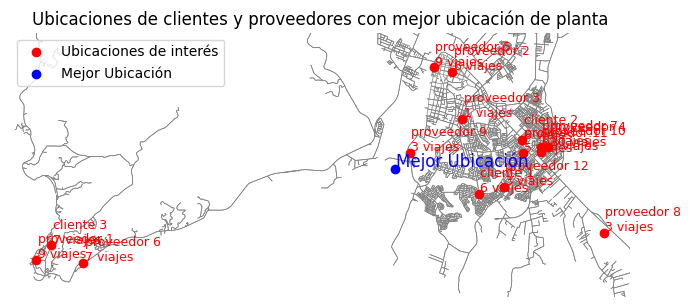

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular los límites
margen = 0.01
min_long = longitudes.min() - margen
max_long = longitudes.max() + margen
min_lat = latitudes.min() - margen
max_lat = latitudes.max() + margen

# Crear el gráfico
fig, ax = ox.plot_graph(G, node_size=0, edge_color='gray', edge_linewidth=0.5, bgcolor='w', show=False, close=False)
ax.scatter(longitudes, latitudes, color='red', label='Ubicaciones de interés', zorder=3)

# Añadir textos
for i, nombre in enumerate(coordenadas['nombre']):
    ax.text(longitudes[i] + 0.0005, latitudes[i] + 0.0005, f"{nombre}\n{viajes_diarios[i]} viajes", fontsize=9, color='red', zorder=4)

# Mejor ubicación
ax.scatter(mejor_lon, mejor_lat, color='blue', label='Mejor Ubicación', zorder=3)
ax.text(mejor_lon + 0.0005, mejor_lat + 0.0005, "Mejor Ubicación", fontsize=12, color='blue', zorder=4)

# Configurar límites del gráfico
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

# Títulos y etiquetas
ax.set_title('Ubicaciones de clientes y proveedores con mejor ubicación de planta')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()
plt.show()
